# Limitations of Euler's Method – Airy Equation

We consider the Airy differential equation:

$$
\frac{d^2 x}{dt^2} = t x(t)
$$

This is a second-order differential equation. To solve it numerically, we convert it into two first-order equations.

Let

$$
x_1 = x
$$

$$
x_2 = \frac{dx}{dt}
$$

Then,

$$
\frac{dx_1}{dt} = x_2
$$

$$
\frac{dx_2}{dt} = t x_1
$$

We solve this system using:

1. Euler’s method
2. scipy's solve_ivp with Radau method

We compare the results for different numbers of Euler steps:

$$
n = 1000,\ 3000,\ 5000,\ 10000
$$

This illustrates the accuracy limitations of Euler’s method.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
def euler_airy(n):

    t0 = -30
    t1 = 2

    t = np.linspace(t0, t1, n)

    dt = t[1] - t[0]

    x = np.zeros(n)
    v = np.zeros(n)

    # initial conditions (choose reasonable values)
    x[0] = 1
    v[0] = 0

    for i in range(n-1):

        x[i+1] = x[i] + dt*v[i]
        v[i+1] = v[i] + dt*t[i]*x[i]

    return t, x

In [4]:
def airy_system(t, y):

    x = y[0]
    v = y[1]

    dxdt = v
    dvdt = t*x

    return [dxdt, dvdt]


sol = solve_ivp(

    airy_system,
    [-30, 2],
    [1, 0],
    method='Radau',
    t_eval=np.linspace(-30,2,10000)

)

t_exact = sol.t
x_exact = sol.y[0]

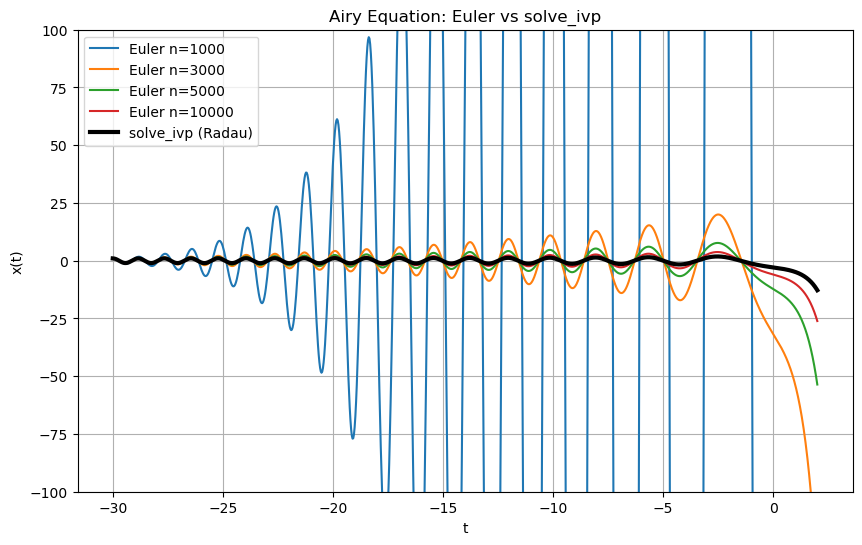

In [8]:
steps = [1000, 3000, 5000, 10000]

plt.figure(figsize=(10,6))


for n in steps:

    t, x = euler_airy(n)

    plt.plot(t, x, label=f"Euler n={n}")


plt.plot(t_exact, x_exact, 'k', linewidth=3, label="solve_ivp (Radau)")


plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Airy Equation: Euler vs solve_ivp")

plt.legend()

plt.grid()

plt.ylim(-100,100)

plt.show()

# Observations

From the graph, we observe:

• For small number of steps (n = 1000), Euler’s method is inaccurate.

• Increasing the number of steps improves accuracy.

• However, even with n = 10000, Euler’s method deviates from the solve_ivp solution.

# Explanation

Euler’s method is a first-order numerical method.

This means the error per step is proportional to:

$$
\Delta t
$$

Over many steps, the error accumulates.

The Airy equation grows rapidly, making Euler’s method unstable.

The solve_ivp Radau method is a higher-order method and is much more accurate.

# Conclusion

This demonstrates the limitation of Euler’s method:

• It requires very small step sizes for accuracy.

• It can become unstable.

• More advanced methods like Radau are preferred.